## Install & Import libraries

Note: This jupyter notebook was developed in a `Python 3.9.21` environment. 

Assuming `notebook` is already installed on your Python environment, run the next cell to install the remaining libraries needed to run this notebook.

In [610]:
!pip install -r requirements.txt

In [611]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.colors import ListedColormap
from textwrap import wrap

## Load and filter the relevant data

In [738]:
df.shape[0]
df.groupby('Year').size()

Year
2017.0    16716
2018.0    23859
2019.0    19717
2020.0    20036
2021.0    25973
dtype: int64

In [739]:
ds_df.groupby('Year').size()

Year
2017    3764
2018    6079
2019    5683
2020    4151
2021    5917
dtype: int64

In [92]:
df = pd.read_csv('./data/kaggle_survey_2017_2021.csv', header=[0,1])

col_map = dict(df.columns)
df = df.droplevel(level=1, axis=1).rename(columns={'-':'Year'})
df.head()

C:\Users\willi\AppData\Local\Temp\ipykernel_21980\3907501901.py:1: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,20,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,82,83,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,152,153,154,155,156,157,158,159,160,161,162,163,164,165,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,257,258,259,260,261,262,263,264,265,266,268,269,270,271,2

,Year,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,2021,910.0,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,784.0,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,924.0,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
3,2021,575.0,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,781.0,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since Kaggle can be used by anyone on the internet, I filtered the dataset to only include those who work primarily in data science, using the following as a first cut:

In [529]:
ds_df = df[df['Q5'].str.lower().apply(lambda x: type(x) == str and 'data' in x)]
ds_df['Q5'].value_counts()

Q5
Data Scientist           16947
Data Analyst              8509
Data Engineer             2466
DBA/Database Engineer      784
Data Miner                 118
Data Journalist             20
Name: count, dtype: int64

In [533]:
# data engineers and DBA/database engineers focus on the data architecture 
# rather than the science / analysis, so I further excluded these jobs
ds_df = ds_df[~ds_df['Q5'].isin(['Data Engineer', 'DBA/Database Engineer'])]
ds_df['Year'] = ds_df['Year'].astype(int)

In [534]:
ds_df.head()

,Year,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
7,2021,484.0,30-34,Man,India,Bachelorâ€™s degree,Data Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,2021,1315.0,50-54,Man,Belgium,Bachelorâ€™s degree,Data Analyst,20+ years,Python,NaN,...,Neptune.ai,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Domino Model Monitor,NaN,NaN
17,2021,479.0,18-21,Man,Pakistan,Bachelorâ€™s degree,Data Scientist,1-3 years,Python,NaN,...,NaN,Weights & Biases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2021,551.0,25-29,Woman,Turkey,Bachelorâ€™s degree,Data Scientist,3-5 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2021,525.0,22-24,Woman,"Iran, Islamic Republic of...",Bachelorâ€™s degree,Data Scientist,3-5 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

In [ ]:
#Look at the type of information available in the dataset based on the questions
col_map

{'-': 'Year',
 'Time from Start to Finish (seconds)': 'Duration (in seconds)',
 'Q1': 'What is your age (# years)?',
 'Q2': 'What is your gender? - Selected Choice',
 'Q3': 'In which country do you currently reside?',
 'Q4': 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
 'Q5': 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
 'Q6': 'For how many years have you been writing code and/or programming?',
 'Q7_Part_1': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python',
 'Q7_Part_2': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R',
 'Q7_Part_3': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL',
 'Q7_Part_4': 'What programming languages do you use on a regular basis? (Select all that apply) - S

##### Demographics (Age)

Year   2017  2018  2019  2020  2021
Q1                                 
18-21    75   358   306   268   534
22-24   419  1164   894   649  1013
25-29  1108  2006  1617  1064  1495
30-34   900  1230  1175   802  1045
35-39   526   621   712   556   694
40-44   266   308   395   344   480
45-49   175   163   224   200   277
50-54   122   105   176   123   184
55-59    67    72    97    61    98
60+      46    52    87    84    97


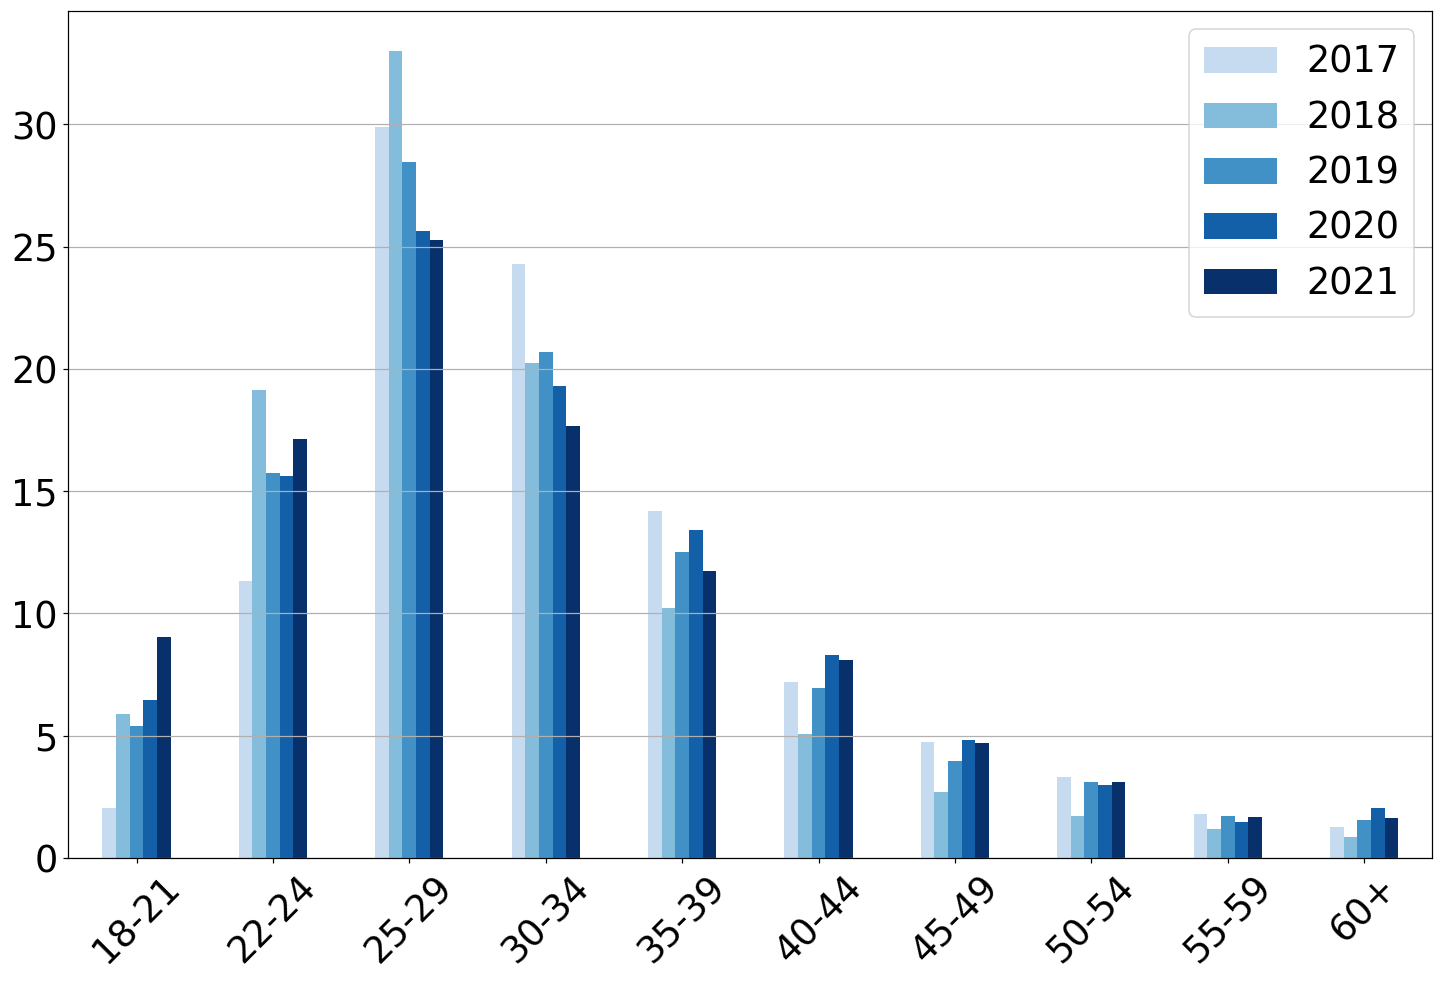

In [608]:
# Age counts across the years
age_counts = ds_df.groupby(['Q1','Year']).size().unstack()
age_counts.loc['60+'] = age_counts.loc['60-69'] + age_counts.loc['70+']
age_counts = age_counts.drop(index=['60-69', '70+'])
print(age_counts)

# Plot the percentage of each age group over the years
age_pcts = age_counts/age_counts.sum(axis=0)*100
cmap = plt.get_cmap('Blues')
cmap = ListedColormap(cmap(np.linspace(0.25, 1, 5)))
ax = age_pcts.plot(kind='bar', figsize=(16,10), 
              xlabel='', ylabel='',
              fontsize='24', colormap=cmap, rot=45)
ax.yaxis.grid(True, which='major')
plt.legend(prop={'size':24})

##### Demographics (Gender)

In [ ]:
#Possible values for gender
ds_df['Q2'].value_counts()

Q2
Male                                                 12609
Man                                                   8034
Female                                                2707
Woman                                                 1875
Prefer not to say                                      249
Prefer to self-describe                                 47
A different identity                                    24
Nonbinary                                               21
Non-binary, genderqueer, or gender non-conforming       13
Name: count, dtype: int64

In [536]:
#Create "Others" category to 
ds_df['Q2'] = ds_df['Q2'].replace({
    'Man':'Male', 
    'Woman':'Female',
    'Prefer not to say':'Others',
    'Prefer to self-describe': 'Others',
    'A different identity': 'Others',
    'Nonbinary': 'Others',
    'Non-binary, genderqueer, or gender non-conforming': 'Others'
})

Year    2017  2018  2019  2020  2021
Q2                                  
Female   648  1106   953   786  1089
Male    3064  4883  4662  3304  4730
Others    37    90    68    61    98


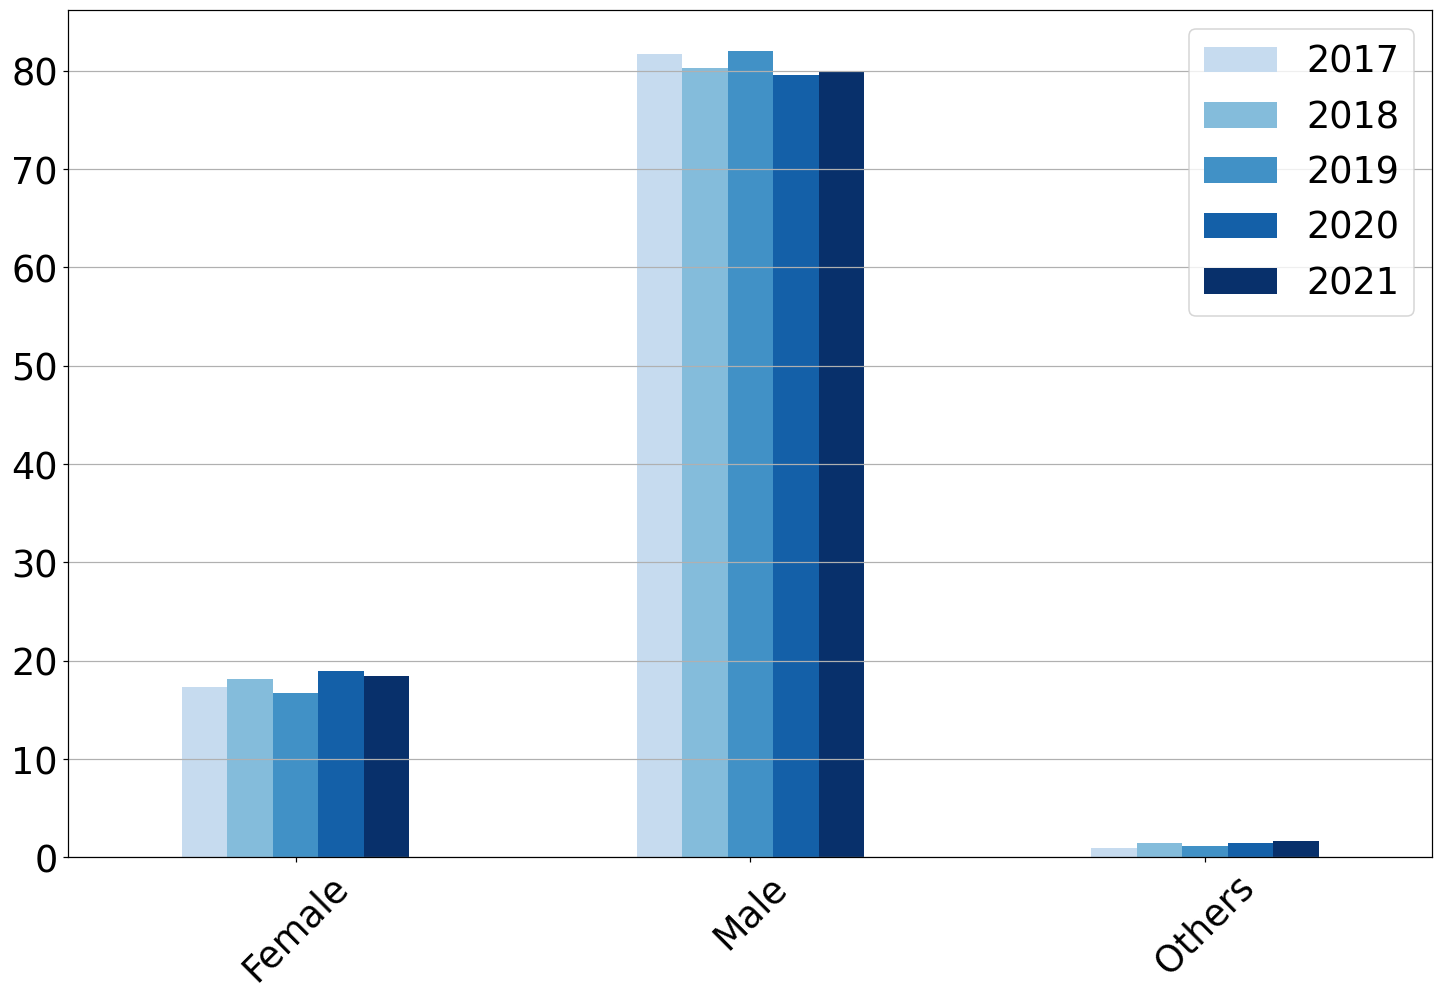

In [607]:
# Gender counts across the years
gender_counts = ds_df.groupby(['Q2','Year']).size().unstack()
print(gender_counts)

# Plot the percentage of each gender over the years
age_pcts = gender_counts/gender_counts.sum(axis=0)*100
cmap = plt.get_cmap('Blues')
cmap = ListedColormap(cmap(np.linspace(0.25, 1, 5)))
ax = age_pcts.plot(kind='bar', figsize=(16,10), 
              xlabel='', ylabel='',
              fontsize='24', colormap=cmap, rot=45)
ax.yaxis.grid(True, which='major')
plt.legend(prop={'size':24})

##### Demographics (Education)

In [538]:
# Formal education across the years
ds_df.groupby(['Q4', 'Year']).size().unstack()

Year,2017,2018,2019,2020,2021
Q4,,,,,
Bachelor's degree,1026.0,NaN,NaN,NaN,NaN
Bachelorâ€™s degree,NaN,1495.0,1435.0,1149.0,1982.0
Doctoral degree,683.0,904.0,872.0,535.0,663.0
I did not complete any formal education past high school,24.0,NaN,NaN,NaN,NaN
I prefer not to answer,7.0,61.0,72.0,65.0,116.0
Master's degree,1810.0,NaN,NaN,NaN,NaN
Masterâ€™s degree,NaN,3294.0,2925.0,2084.0,2753.0
No formal education past high school,NaN,39.0,42.0,29.0,67.0
Professional degree,100.0,128.0,178.0,156.0,NaN


In [539]:
#standardize the possible responses
ds_df.loc[:,'Q4'] = ds_df['Q4'].str.replace('â€™s', "'s")
ds_df.loc[:,'Q4'] = ds_df['Q4'].replace({'I did not complete any formal education past high school': 'No formal education past high school',
                                   'Some college/university study without earning a bachelor\'s degree': 'College/University w/o Bachelor\'s degree'})


edu_all_df = ds_df[['Year','Q4']]
edu_all_df = edu_all_df[edu_all_df['Q4'].apply(lambda x: x not in ['Professional degree', 'Professional doctorate'])]

[Text(0, 0, '1.1'),
 Text(0, 0, '4.5'),
 Text(0, 0, '33.9'),
 Text(0, 0, '47.1'),
 Text(0, 0, '11.3')]

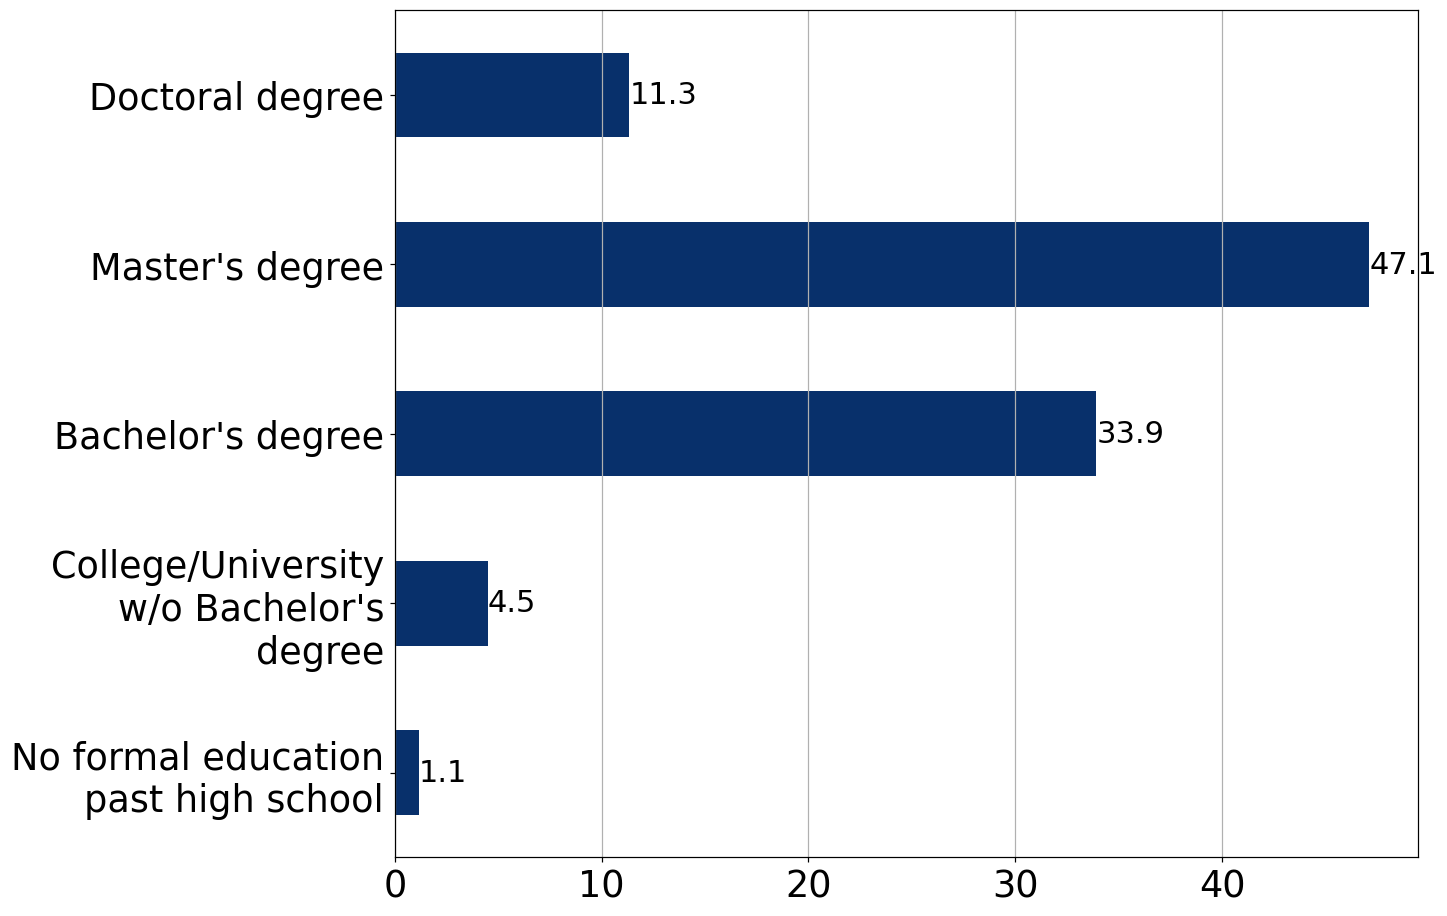

In [540]:
# Formal education in 2021
edu_2021_df = edu_all_df[edu_all_df['Year'] == 2021].groupby('Q4').size()
edu_2021_df = edu_2021_df/edu_2021_df.sum() * 100 
labels = ['No formal education past high school',
          'College/University w/o Bachelor\'s degree',
          'Bachelor\'s degree',
          'Master\'s degree',
          'Doctoral degree']

ax = edu_2021_df.loc[labels].plot(
    kind='barh', figsize=(12,10), 
    xlabel='', ylabel='',
    fontsize='24', color=cmap(1.))
ax.xaxis.grid(True, which='major')
ax.set_yticklabels(['\n'.join(wrap(l,20)) for l in labels])
ax.bar_label(ax.containers[0], fmt='%.1f',fontsize='20')

Year                                      2017  2018  2019  2020  2021
Q4                                                                    
Bachelor's degree                         1026  1495  1435  1149  1982
College/University w/o Bachelor's degree    92   158   159   133   263
Doctoral degree                            683   904   872   535   663
I prefer not to answer                       7    61    72    65   116
Master's degree                           1810  3294  2925  2084  2753
No formal education past high school        24    39    42    29    67


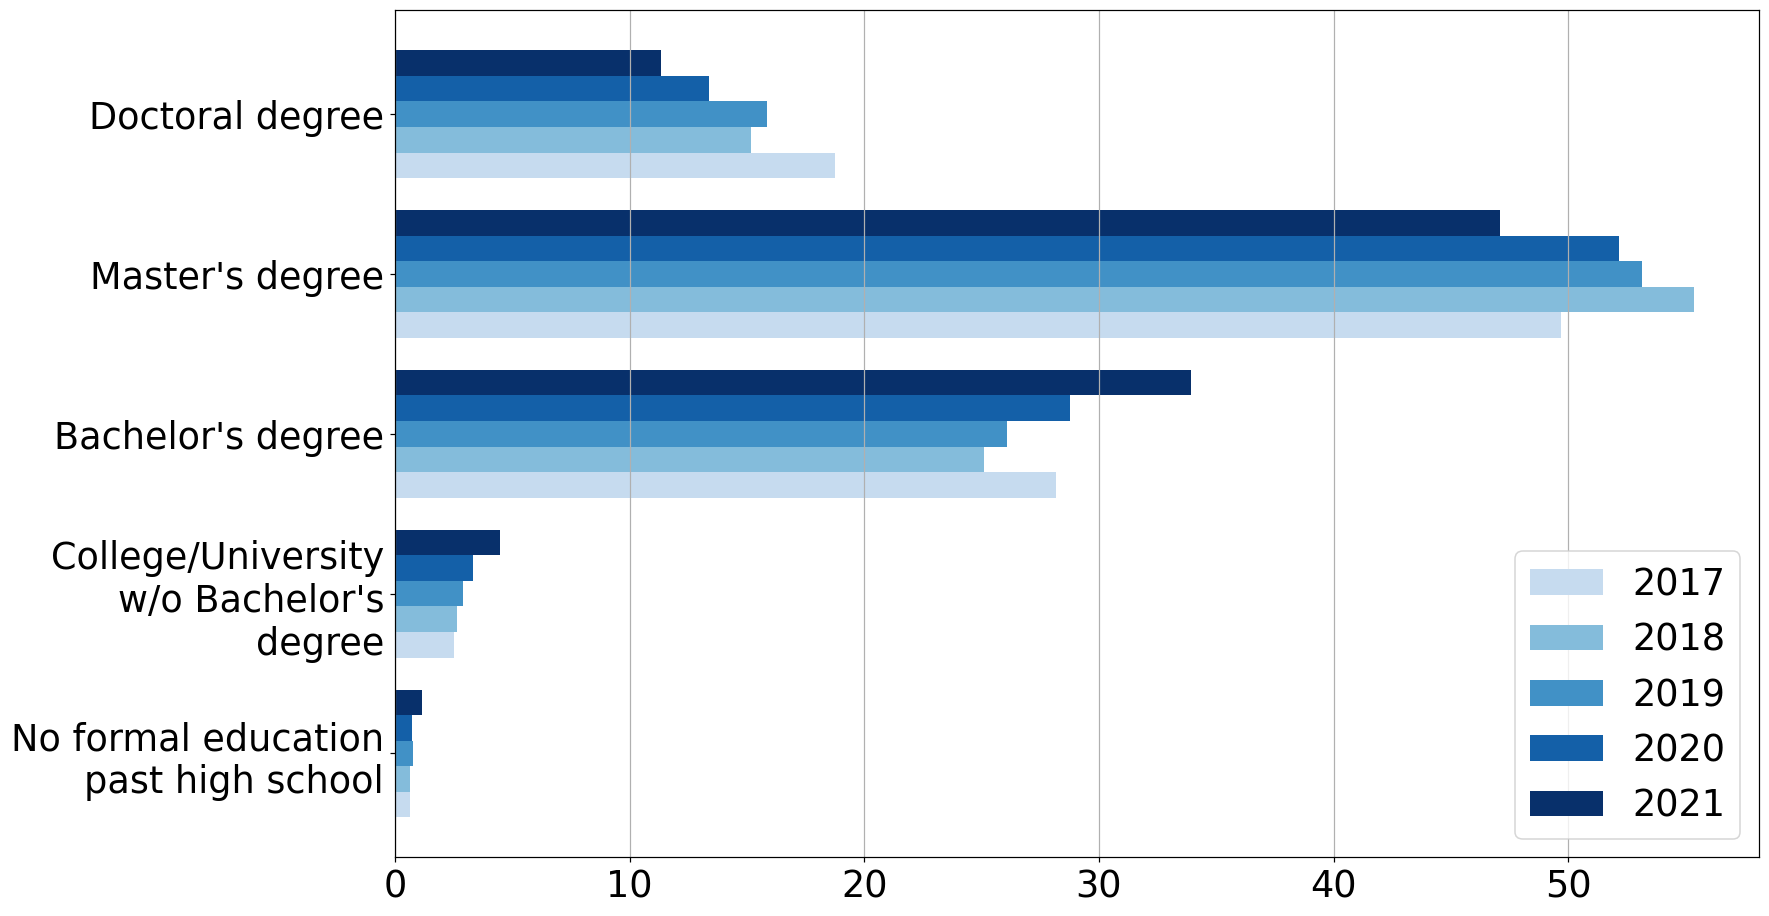

In [541]:
# Educational category counts across the years
edu_all_df['Year'] = edu_all_df['Year'].astype(int)
edu_count = edu_all_df.groupby(['Q4','Year']).size().unstack()
print(edu_count)

# Plot the percentage of each education category over the years
edu_pcts = edu_count/edu_count.sum(axis=0)*100
labels = ['No formal education past high school',
          'College/University w/o Bachelor\'s degree',
          'Bachelor\'s degree',
          'Master\'s degree',
          'Doctoral degree']
cmap = plt.get_cmap('Blues')
cmap = ListedColormap(cmap(np.linspace(0.25, 1, 5)))
ax = edu_pcts.loc[labels].plot(kind='barh', figsize=(16,10), 
              xlabel='', ylabel='',
              fontsize='24', colormap=cmap, width=0.8)
ax.xaxis.grid(True, which='major')
ax.set_yticklabels(['\n'.join(wrap(l,20)) for l in labels])
plt.legend(prop={'size':24})


In [699]:
edu_pcts

Year,2017,2018,2019,2020,2021
Q4,,,,,
Bachelor's degree,28.171334,25.121828,26.067212,28.760951,33.915127
College/University w/o Bachelor's degree,2.526085,2.655016,2.888283,3.329161,4.500342
Doctoral degree,18.753432,15.190724,15.840145,13.391740,11.344969
I prefer not to answer,0.192202,1.025038,1.307902,1.627034,1.984942
Master's degree,49.697968,55.352042,53.133515,52.165207,47.108145
No formal education past high school,0.658979,0.655352,0.762943,0.725907,1.146475


In [698]:
below_bd = ["College/University w/o Bachelor's degree", "No formal education past high school"]
print('\% of respondents whose highest education is lower than Bachelor\'s degree', edu_pcts.loc[below_bd,2017].sum())
print('\% of respondents whose highest education is lower than Bachelor\'s degree', edu_pcts.loc[below_bd,2021].sum())

\% of respondents whose highest education is lower than Bachelor's degree 3.185063152114223
\% of respondents whose highest education is lower than Bachelor's degree 5.646817248459959


##### Programming Languages

In [702]:
plang_df['Python'].sum()

np.int64(17416)

In [551]:
plang_cols = ['Q7_Part_' + str(i) for i in range(1,13)] + ['Q7_OTHER']
plang_df = pd.concat([ds_df[['Year','Q5']], ~ds_df[plang_cols].isnull()], axis=1)\
    .rename(columns={'Q5': 'Job Title'})\
    .rename(columns=col_map)
plang_df.columns = list(map(lambda x: x.split("-")[-1].strip(), plang_df.columns))
plang_df['Year'] = plang_df['Year'].astype(int)
plang_df = plang_df[(plang_df['Job Title'] == 'Data Scientist') | (plang_df['Job Title'] == 'Data Analyst')]

In [ ]:
plang_job_counts = plang_df.groupby(['Year','Job Title']).sum()

#Question was not asked in 2017, and nobody answered 'None'
plang_job_counts = plang_job_counts.drop(2017).drop('None', axis=1)
plang_job_counts

Python     R   SQL    C  C++  Java  Javascript  Julia  \
Year Job Title                                                               
2018 Data Analyst      1198   844  1020    0    0   172         161      9   
     Data Scientist    3346  1654  1950    0    0   433         396     56   
2019 Data Analyst       982   553   796   56   59    75         103      0   
     Data Scientist    3134  1374  1926  191  302   317         344      0   
2020 Data Analyst      1123   471   815  111  143   107         147      9   
     Data Scientist    2453   975  1473  247  323   305         290     71   
2021 Data Analyst      1804   715  1399  171  205   214         229     13   
     Data Scientist    3376  1140  1987  374  479   439         398     56   

                     Swift  Bash  MATLAB  Other  
Year Job Title                                   
2018 Data Analyst        0   133     133     35  
     Data Scientist      0   719     329     87  
2019 Data Analyst        0    87      80     78  
     Data Scientist      0   653     215    233  
2020 Data Analyst        9    74     105    128  
     Data Scientist     14   405     242    245  
2021 Data Analyst       13   102     177    213  
     Data Scientist     24   426     330    272

Year        2018  2019  2020  2021
Python      4544  4116  3576  5180
R           2498  1927  1446  1855
SQL         2970  2722  2288  3386
C              0   247   358   545
C++            0   361   466   684
Java         605   392   412   653
Javascript   557   447   437   627
Julia         65     0    80    69
Swift          0     0    23    37
Bash         852   740   479   528
MATLAB       462   295   347   507
Other        122   311   373   485


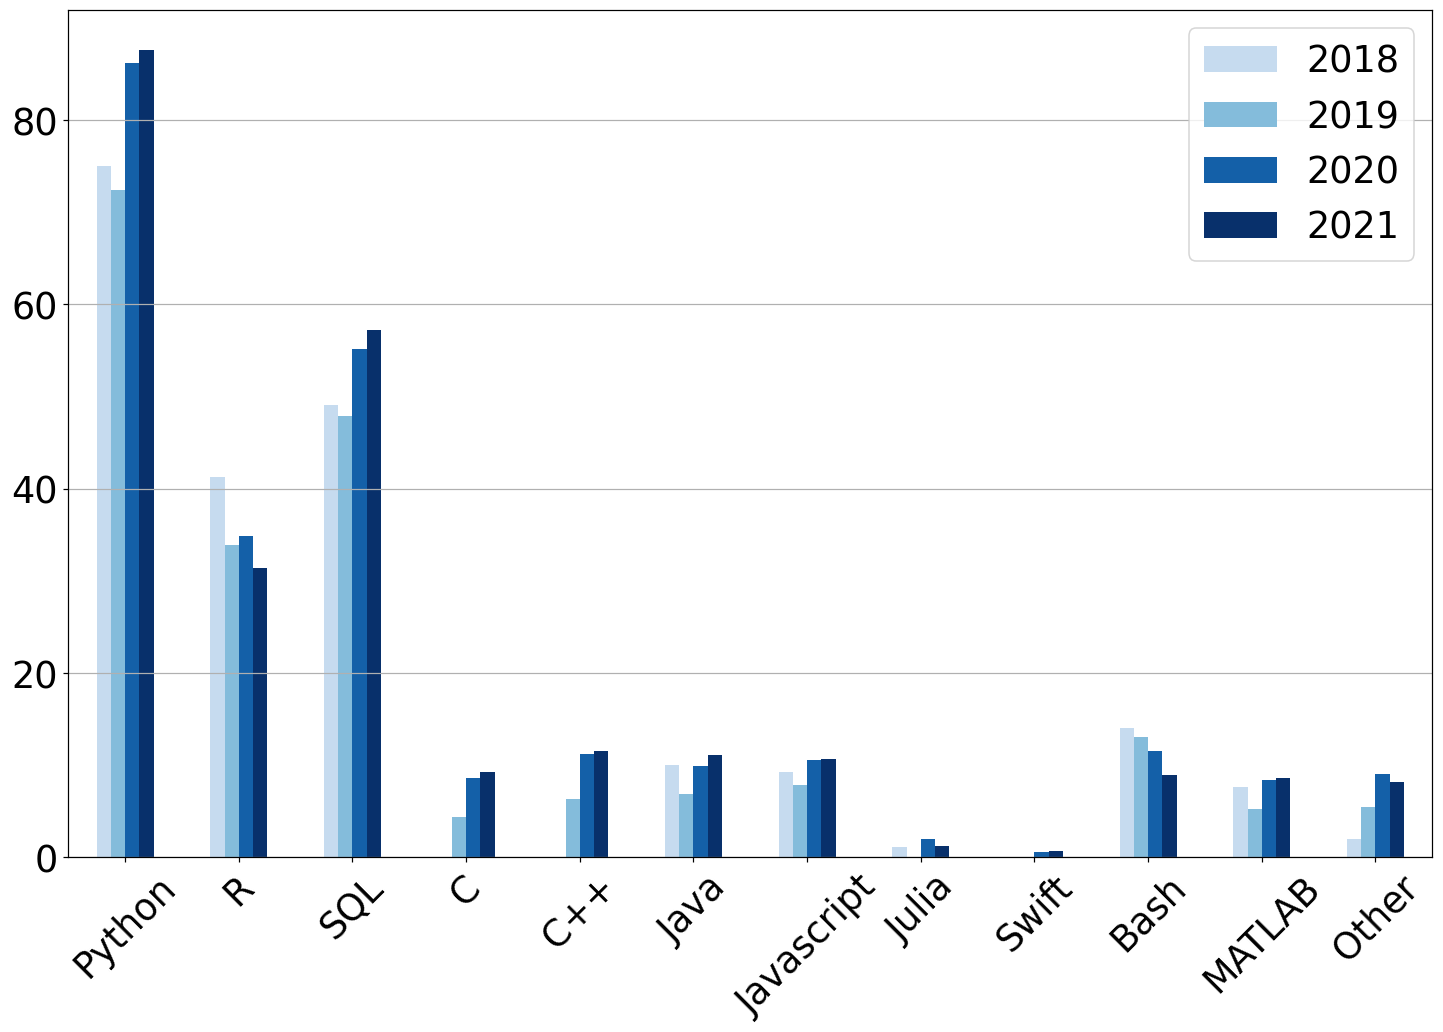

In [707]:
# Programming Language counts across the years
plang_counts = plang_job_counts.reset_index('Job Title', drop=True).groupby('Year').sum().transpose()
print(plang_counts)

# Plot the percentage of each Programming Language usage over the years
plang_pcts = plang_counts/plang_df.groupby('Year').size().drop(2017)*100
cmap = plt.get_cmap('Blues')
cmap = ListedColormap(cmap(np.linspace(0.25, 1, 5)))
ax = plang_pcts.plot(kind='bar', figsize=(16,10), 
              xlabel='', ylabel='',
              fontsize='24', colormap=cmap, rot=45)
ax.yaxis.grid(True, which='major')
plt.legend(prop={'size':24})

In [708]:
plang_pcts

Year,2018,2019,2020,2021
Python,74.995874,72.426535,86.147916,87.544364
R,41.227925,33.908147,34.834980,31.350346
SQL,49.017990,47.897237,55.119248,57.224945
C,0.000000,4.346296,8.624428,9.210749
C++,0.000000,6.352279,11.226211,11.559912
Java,9.985146,6.897765,9.925319,11.035998
Javascript,9.192936,7.865564,10.527584,10.596586
Julia,1.072784,0.000000,1.927246,1.166131
Swift,0.000000,0.000000,0.554083,0.625317
Bash,14.061726,13.021292,11.539388,8.923441


##### Machine Learning Frameworks

In [572]:
ml_fw_cols = ['Q16_Part_' + str(i) for i in range(1,15)] + ['Q16_Part_17', 'Q16_OTHER']
ml_fw_df = pd.concat([ds_df[['Year','Q5']], ~ds_df[ml_fw_cols].isnull()], axis=1)\
    .rename(columns={'Q5': 'Job Title'})\
    .rename(columns=col_map)
ml_fw_df.columns = list(map(lambda x: x.split(" - ")[-1].strip(), ml_fw_df.columns))
ml_fw_df['Year'] = ml_fw_df['Year'].astype(int)
ml_fw_df = ml_fw_df[(ml_fw_df['Job Title'] == 'Data Scientist') | (ml_fw_df['Job Title'] == 'Data Analyst')]

In [590]:
ml_fw_job_counts = ml_fw_df.groupby(['Year','Job Title']).sum()

# Question was not asked in 2017, and nobody answered 'None'
ml_fw_job_counts = ml_fw_job_counts.drop(2017).drop('None', axis=1)
ml_fw_job_counts

Scikit-learn  TensorFlow  Keras  PyTorch  Fast.ai  MXNet  \
Year Job Title                                                                  
2018 Data Analyst             914         550    445      162       32     31   
     Data Scientist          3042        2338   2151      953      379    199   
2019 Data Analyst             684         299    299      178       44      0   
     Data Scientist          2636        1540   1682      880      298      0   
2020 Data Analyst             737         383    316      214       23      5   
     Data Scientist          2023        1233   1234      754      181     51   
2021 Data Analyst            1140         583    473      333       40     25   
     Data Scientist          2702        1729   1554     1107      185     54   

                     Xgboost  LightGBM  CatBoost  Prophet  H2O 3  Caret  \
Year Job Title                                                            
2018 Data Analyst        465       156        83       76    124    292   
     Data Scientist     2014       841       445      364    582    841   
2019 Data Analyst        314       144         0        0      0    122   
     Data Scientist     1653       916         0        0      0    492   
2020 Data Analyst        275       103        52       50     25    102   
     Data Scientist     1182       637       334      242    146    341   
2021 Data Analyst        469       198       100       79     45    133   
     Data Scientist     1571       823       464      332    175    323   

                     Tidymodels  JAX  Other  
Year Job Title                               
2018 Data Analyst             0    0     27  
     Data Scientist           0    0    113  
2019 Data Analyst             0    0     14  
     Data Scientist           0    0    117  
2020 Data Analyst            60    6     18  
     Data Scientist         175   16     91  
2021 Data Analyst            94   16     46  
     Data Scientist         178   37     90

Year          2018  2019  2020  2021
Scikit-learn  3956  3320  2760  3842
TensorFlow    2888  1839  1616  2312
Keras         2596  1981  1550  2027
PyTorch       1115  1058   968  1440
Fast.ai        411   342   204   225
MXNet          230     0    56    79
Xgboost       2479  1967  1457  2040
LightGBM       997  1060   740  1021
CatBoost       528     0   386   564
Prophet        440     0   292   411
H2O 3          706     0   171   220
Caret         1133   614   443   456
Tidymodels       0     0   235   272
JAX              0     0    22    53
Other          140   131   109   136


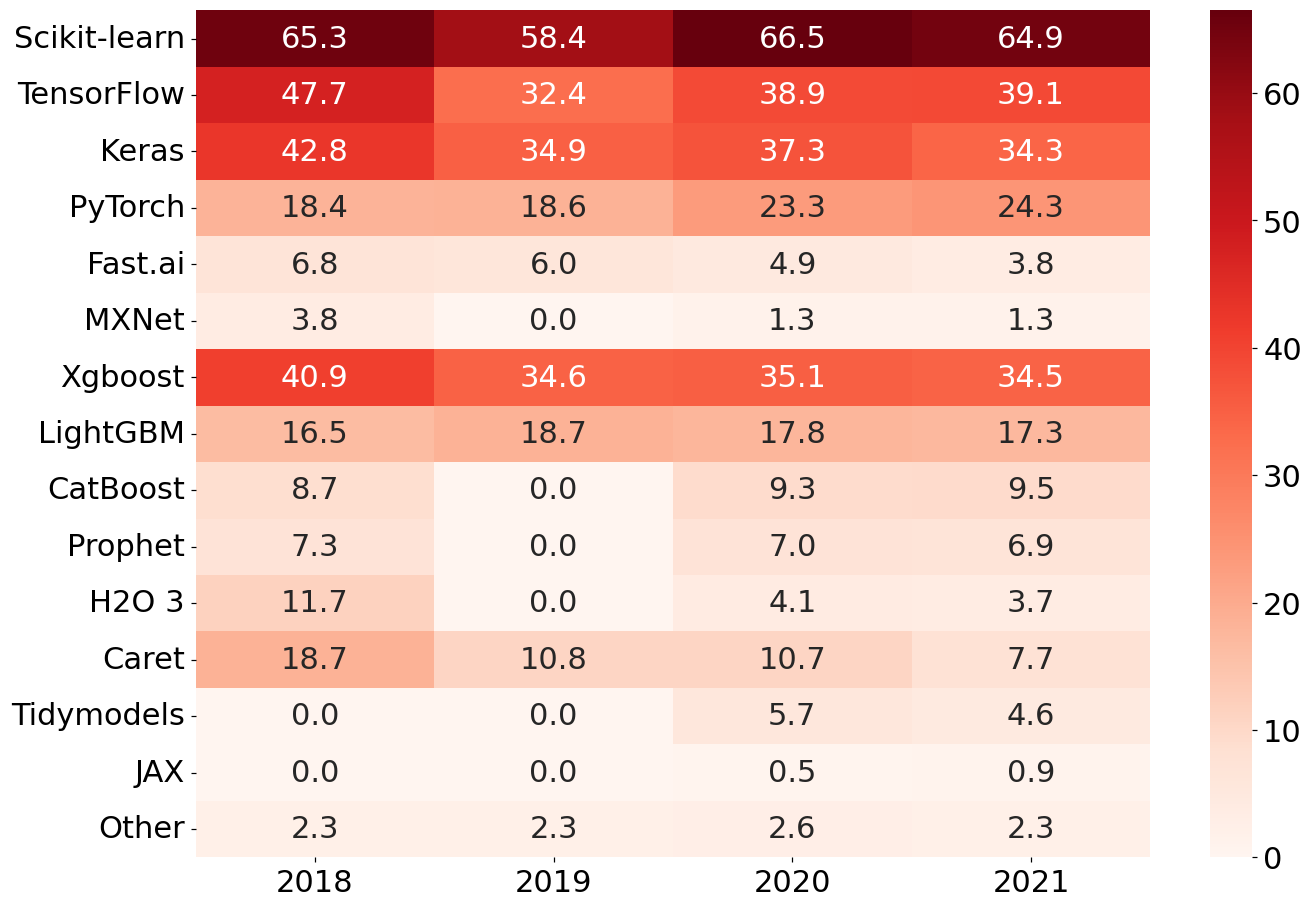

In [709]:
# Programming Language counts across the years
ml_fw_counts = ml_fw_job_counts.reset_index('Job Title', drop=True).groupby('Year').sum().transpose()
print(ml_fw_counts)

# Plot the percentage of each Programming Language usage over the years
ml_fw_pcts = ml_fw_counts/ml_fw_df.groupby('Year').size().drop(2017)*100
ax = sns.heatmap(ml_fw_pcts, cmap='Reds', annot=True, fmt=".1f", annot_kws={'fontsize': 20})
ax.figure.set_size_inches((14,10))
ax.figure.axes[-1].tick_params(labelsize=20)
ax.set(xlabel='')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

Text(0.5, 1.025, 'Data Scientist')

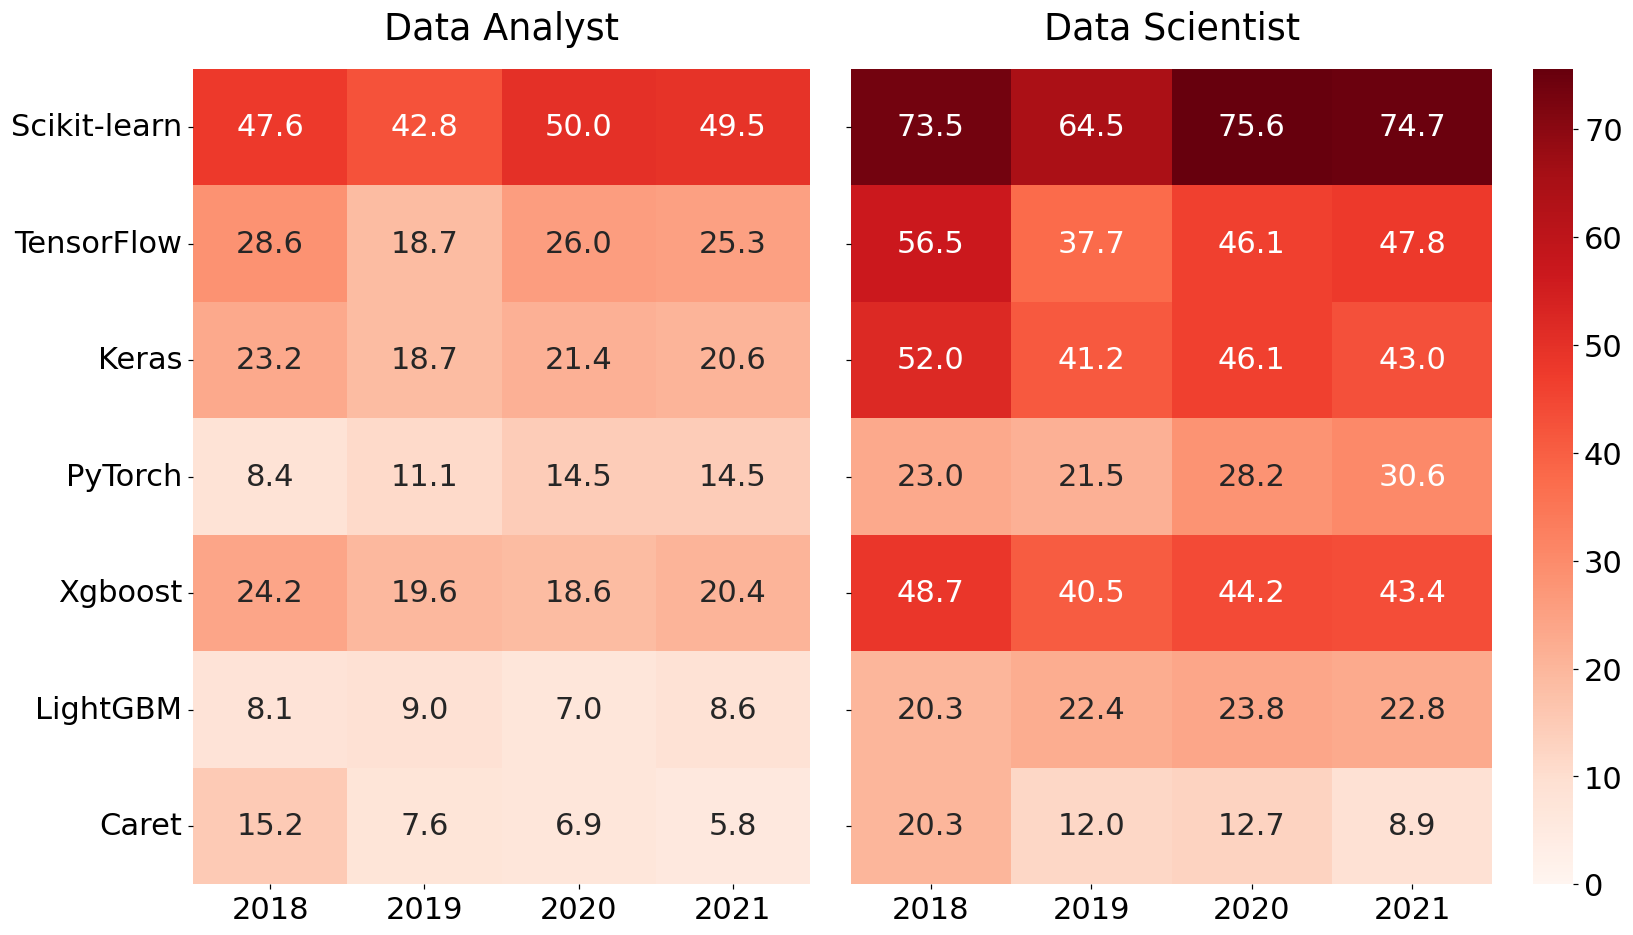

In [733]:
# Programming Language counts across the years
tools_subset = ['Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'Xgboost', 'LightGBM', 'Caret']
ml_fw_da_counts = ml_fw_job_counts.loc[pd.IndexSlice[:,'Data Analyst'],tools_subset].reset_index(level=1, drop=True).transpose()
ml_fw_ds_counts = ml_fw_job_counts.loc[pd.IndexSlice[:,'Data Scientist'],tools_subset].reset_index(level=1, drop=True).transpose()

# Plot the percentage of each Programming Language usage over the years
ml_fw_da_pcts = ml_fw_da_counts/ml_fw_df.groupby(['Year', 'Job Title']).size().drop(2017).loc[pd.IndexSlice[:,'Data Analyst']]*100
ml_fw_ds_pcts = ml_fw_ds_counts/ml_fw_df.groupby(['Year', 'Job Title']).size().drop(2017).loc[pd.IndexSlice[:,'Data Scientist']]*100
vmin = 0
vmax = max(ml_fw_da_pcts.max().max(), ml_fw_ds_pcts.max().max())


fig, axs = plt.subplots(1,2, figsize=(14,8), gridspec_kw={'width_ratios':[1,1.3]}, sharey=True)
fig.tight_layout()
sns.heatmap(ml_fw_da_pcts, cmap='Reds', annot=True, fmt=".1f", annot_kws={'fontsize': 20}, ax=axs[0], vmin=vmin, vmax=vmax, cbar=False)
sns.heatmap(ml_fw_ds_pcts, cmap='Reds', annot=True, fmt=".1f", annot_kws={'fontsize': 20}, ax=axs[1], vmin=vmin, vmax=vmax)
axs[0].figure.axes[-1].tick_params(labelsize=20)
axs[0].set(xlabel='')
axs[0].tick_params(axis='x', labelsize=20)
axs[0].tick_params(axis='y', labelsize=20, labelrotation=0)
axs[0].set_title('Data Analyst', fontsize=24, y=1.025)

axs[1].set(xlabel='')
axs[1].tick_params(axis='x', labelsize=20)
axs[1].set_title('Data Scientist', fontsize=24, y=1.025)

In [732]:
ml_fw_df['Deep Learning'] = ml_fw_df['TensorFlow'] | ml_fw_df['Keras'] | ml_fw_df['PyTorch']
ml_fw_job_counts = ml_fw_df.groupby(['Year','Job Title']).sum()

# Question was not asked in 2017, and nobody answered 'None'
ml_fw_job_counts = ml_fw_job_counts.drop(2017).drop('None', axis=1)
ml_fw_job_counts

deep_learning_DA = ml_fw_job_counts.loc[pd.IndexSlice[:,'Data Analyst'],['Deep Learning']].reset_index(level=1, drop=True).transpose()
deep_learning_DA = deep_learning_DA/ml_fw_df.groupby(['Year', 'Job Title']).size().drop(2017).loc[pd.IndexSlice[:,'Data Analyst']]*100
print("% of Data Analysts who use a deep learning library:")
deep_learning_DA

% of Data Analysts who use a deep learning library:


Year,2018,2019,2020,2021
Deep Learning,35.431842,28.1602,35.050847,34.854411
